# A2: Bias in Data
Sarah Innis
October 16, 2025

The goal of this assignment is to investigate two research questions regarding potential sources of bias in the Wikipedia Talk Corpus and to reflect on potential implications of Perspective API. 

### Import Packages

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

### Load Data
I selected the toxicity and personal attacks dataset for further review.
Data was downloaded from https://figshare.com/projects/Wikipedia_Talk/16731
The data is available under a CC0 license https://wiki.creativecommons.org/wiki/CC0
Reference README.MD for more information on the data.

**Toxicity files:**
Load comments from toxicity data.

In [68]:
toxicity_annotated_comments = pd.read_csv('toxicity_annotated_comments.tsv', sep = '\t')
toxicity_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test


Load annotations from toxicity data.

In [69]:
toxicity_annotations = pd.read_csv('toxicity_annotations.tsv', sep = '\t')
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


Load annotator demographics from toxicity data.

In [70]:
toxicity_worker_demographics = pd.read_csv('toxicity_worker_demographics.tsv', sep = '\t')
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


**Personal attacks files:**
Load comments from personal attack data.

In [71]:
attack_annotated_comments = pd.read_csv('attack_annotated_comments.tsv', sep = '\t')
attack_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


Load annotations from personal attack data.

In [72]:
attack_annotations = pd.read_csv('attack_annotations.tsv', sep = '\t')
attack_annotations.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


Load annotator demographics from personal attack data.

In [73]:
attack_worker_demographics = pd.read_csv('attack_worker_demographics.tsv', sep = '\t')
attack_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


### Merge Data

**Toxicity data:**
Merge comments and annotations

In [74]:
toxicity_annotations_and_comments = toxicity_annotated_comments.merge(toxicity_annotations, how = 'inner', on = 'rev_id')
toxicity_annotations_and_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0
1,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,4000,0,0.0
2,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3989,0,1.0
3,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3341,0,0.0
4,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1574,0,1.0


Merge the combined comments and annotations with annotator demographic data.

In [75]:
toxicity_a_c_d = toxicity_annotations_and_comments.merge(toxicity_worker_demographics, how = 'inner', on = 'worker_id')
toxicity_a_c_d.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
1,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,4000,0,0.0,male,1,18-30,hs
2,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3989,0,1.0,female,0,18-30,bachelors
3,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1574,0,1.0,female,0,30-45,bachelors
4,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1508,0,1.0,female,1,45-60,hs


**Personal attacks:**
Merge comments and annotations

In [76]:
attack_annotations_and_comments = attack_annotated_comments.merge(attack_annotations, how = 'inner', on = 'rev_id')
attack_annotations_and_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0
1,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,2408,0.0,0.0,0.0,0.0,0.0
2,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1493,0.0,0.0,0.0,0.0,0.0
3,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1439,0.0,0.0,0.0,0.0,0.0
4,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,170,0.0,0.0,0.0,0.0,0.0


Merge the combined comments and annotations with annotator demographic data. 

In [77]:
attack_a_c_d = attack_annotations_and_comments.merge(attack_worker_demographics, how = 'inner', on = 'worker_id')
attack_a_c_d.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,gender,english_first_language,age_group,education
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
1,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,2408,0.0,0.0,0.0,0.0,0.0,male,1,30-45,hs
2,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1493,0.0,0.0,0.0,0.0,0.0,female,0,30-45,bachelors
3,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1439,0.0,0.0,0.0,0.0,0.0,male,0,18-30,hs
4,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,176,0.0,0.0,0.0,0.0,0.0,male,0,18-30,hs


### Research Question 1: Is temporal variations bias present in the personal attack dataset? Is the proportion of personal attack identifications different per year?

As many companies employ machine learning engineers to monitor their models and make sure they are not drifting over time, I thought looking into temporal bias would be interesting in this case since it sounds like since this model was published it has not been retrained on more current data. I'd hypothesize that online hostility and the way that it is communicated changes over time and this could impact generalizability of the model.

First, I will manipulate the data to get it into a format to answer this question.
Get an average of the attack rating across annotators for a comment.

In [78]:
mean_attack = (
    attack_a_c_d
    .groupby("rev_id", as_index=False)
    .agg({
        "attack": "mean",
        "year": "first"
    })
    .rename(columns={"attack": "mean_attack"})
)

Code a comment as an attack if mean_attack is greater than 0.5. This follows the Wikipedia methods of classifying the comment based on annotator consensus.

In [79]:
mean_attack['attack_present'] = mean_attack['mean_attack'] > 0.5
mean_attack.head()

,rev_id,mean_attack,year,attack_present
0,37675,0.00,2002,False
1,44816,0.00,2002,False
2,49851,0.00,2002,False
3,89320,0.75,2002,True
4,93890,0.00,2002,False


Next I want to get an idea of the size of the data. There are 115846 comments total.

In [80]:
len(mean_attack)

115846

There are 14314 labeled as attacks.

In [81]:
mean_attack['attack_present'].sum()

14314

Plot the number of comments labeled attacks over time

<Figure size 800x500 with 0 Axes>

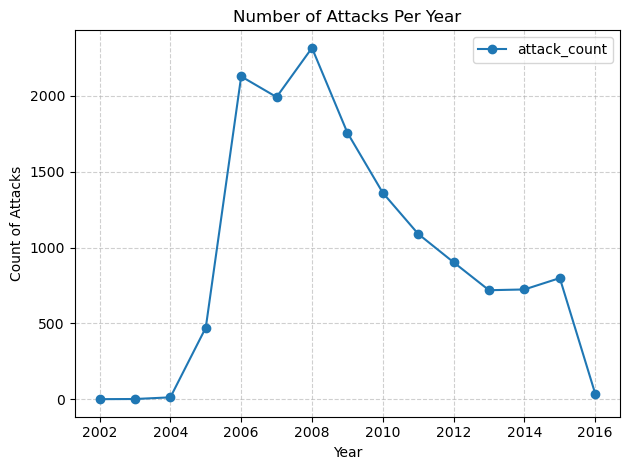

In [82]:
attacks_per_year = (
    mean_attack[mean_attack["attack_present"]]
    .groupby("year")
    .size()
    .reset_index(name="attack_count")
)

plt.figure(figsize=(8,5))
attacks_per_year.plot(
    kind="line",
    x="year",         
    y="attack_count",
    marker="o"
)
plt.title("Number of Attacks Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Attacks")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# save data and plot for reproducibility
attacks_per_year.to_csv('Wikipedia_Talk_num_attacks_over_time_20022016.csv')
plt.savefig('Wikipedia_Talk_num_attacks_over_time_20022016.png')

plt.show()

One thing that could contribute to this is that there might be more comments in the dataset around 2006-2009 and that might be why there are more personal attacks identified. Create a column for proportion of total comments that are personal attacks.

In [83]:
comments_per_year = (
    mean_attack.groupby("year")["rev_id"]
    .nunique()
    .reset_index(name="comment_count")
)

merge_attacks_and_comments = comments_per_year.merge(attacks_per_year, how = 'inner', on = 'year')
merge_attacks_and_comments['proportion_attacks'] = merge_attacks_and_comments['attack_count']/merge_attacks_and_comments['comment_count']
merge_attacks_and_comments.head()

,year,comment_count,attack_count,proportion_attacks
0,2002,48,1,0.020833
1,2003,148,2,0.013514
2,2004,640,13,0.020313
3,2005,4965,472,0.095065
4,2006,17374,2128,0.122482


Plot the proportion of attacks in comments over time. 

<Figure size 800x500 with 0 Axes>

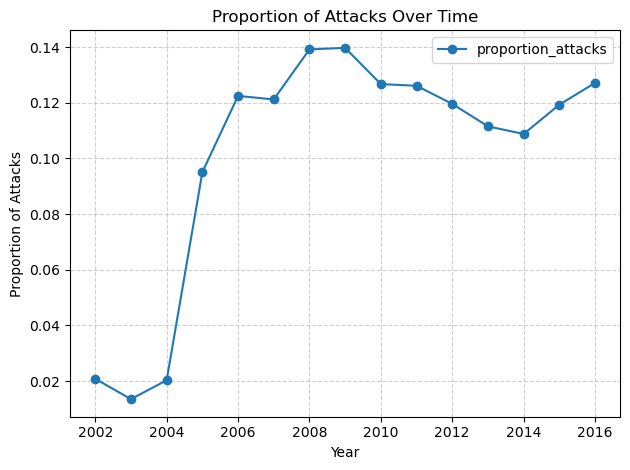

In [84]:
plt.figure(figsize=(8,5))
merge_attacks_and_comments.plot(
    kind="line",
    x="year",         
    y="proportion_attacks",    
    marker="o"
)
plt.title("Proportion of Attacks Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Attacks")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# save data and plot for reproducibility
merge_attacks_and_comments.to_csv('Wikipedia_Talk_prop_attacks_over_time_20022016.csv')
plt.savefig('Wikipedia_Talk_prop_attacks_over_time_20022016.png')

plt.show()

It looks like over time there is not a consistent proportion of personal attacks. This might mean that training models at different points of time could lead to different results. I want to see if this is a real statistical difference. I am going to see if a linear model is statistically significant.

In [85]:
X = sm.add_constant(merge_attacks_and_comments["year"])
y = merge_attacks_and_comments["proportion_attacks"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     proportion_attacks   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.11
Date:                Sun, 19 Oct 2025   Prob (F-statistic):            0.00540
Time:                        22:06:12   Log-Likelihood:                 30.668
No. Observations:                  15   AIC:                            -57.34
Df Residuals:                      13   BIC:                            -55.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.3610      4.039     -3.308      0.0

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Plot the proportion of attacks over time with the modeled linear trend.

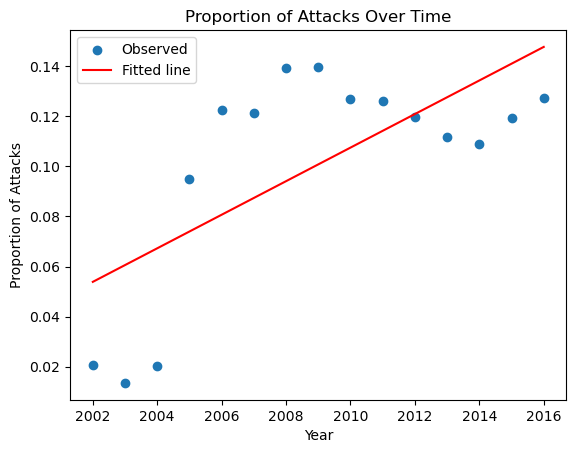

In [86]:
plt.scatter(merge_attacks_and_comments["year"], merge_attacks_and_comments["proportion_attacks"], label="Observed")
plt.plot(
    merge_attacks_and_comments["year"],
    model.predict(X),
    color="red",
    label="Fitted line"
)
plt.title("Proportion of Attacks Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Attacks")
plt.legend()

# model results
model_results = pd.DataFrame({"year": merge_attacks_and_comments["year"], "predicted_prop_attacks": model.predict(X)})

# save data and plot for reproducibility
# scatter data to create this plot has already been saved in the previous step to 'Wikipedia_Talk_prop_attacks_over_time_20022016.csv'
model_results.to_csv('Wikipedia_Talk_model_prop_attacks_over_time_20022016.csv')
plt.savefig('Wikipedia_Talk_prop_attacks_over_time_with_model_20022016.png')

plt.show()

The p-value for the linear model is less than 0.05. This suggests that a null hypothesis that there is no relationship between year and proportion of comments that are personal attacks can be rejected. There is a relationship between year and proportion of attacks.

### End of Analysis 1
"What did you find?
I found that the proportion of comments labeled as attacks changed significantly over time. I found that 2006-2011 had a higher proportion of attacks. It is possible the high proportion of attacks in 2008 could be influenced by the election or financial crisis.

What potential sources of bias did you find?
I identified potential temporal variation bias. One way to view this is to assume that the rate of personal attacks remains constant across years. In that case, differences in labeling could reflect changing perceptions among annotators—each operating within their own cultural and temporal context. Annotators may have failed to recognize certain comments as personal attacks in earlier years because their understanding of what constitutes an “attack” has evolved over time. Alternatively, there may be a true difference in the rate of personal attacks across years, reflecting genuine changes in online behavior or discourse. There could be a true peak in personal attacks in 2008 possibly due to the financial crisis and the model might expect this relationship. If this is the case, the model would need to be continuously updated to reflect the current landscape of personal attacks.

What are some potential impacts of these biases if this dataset were used as part of a product like Perspective API?
If this dataset were used to train a model like the Perspective API, the model might struggle to identify personal attacks accurately in more recent years, such as 2025. Because time is not explicitly included in the model, it would assume that the relationships it learned from historical data still hold true. As language and social norms evolve, the model could fail to recognize new forms of personal attacks. For example, if a racial slur or offensive term emerged after 2016, the model would not be able to detect it, potentially leading to unfair treatment or harm toward that racial group."

-- The above content was ChatGPT generated. ChatGPT was asked "Could you polish this response for grammar and flow?"

One suggestion to correct this bias would be to include time as an element to the model. It is also important to clearly include in your documentation time based limitations of the model and to recommend users of this work to update the work in the time period of use. 


### Research Question 2: Are labelers from different age groups more or less likely to label comments as toxic?

Stemming from the same theme as the analysis above - a person's understanding of language and hate speech is influenced by their personal context. Today it is a common perception that younger generations view many more things as offensive as generations prior. It would be interesting to know what age annotators were. It would also be interesting to determine whether people of different age groups agreed on whether comments were toxic. This analysis can help determine whether the trianing dataset had enough representation from people of different age groups. 

Take a look at the toxicity annotations, comments, and annotator demographic information dataframe created earlier.

In [87]:
toxicity_a_c_d.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
1,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,4000,0,0.0,male,1,18-30,hs
2,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3989,0,1.0,female,0,18-30,bachelors
3,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1574,0,1.0,female,0,30-45,bachelors
4,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1508,0,1.0,female,1,45-60,hs


Determine how many annotations each age group supplied.

<Figure size 800x500 with 0 Axes>

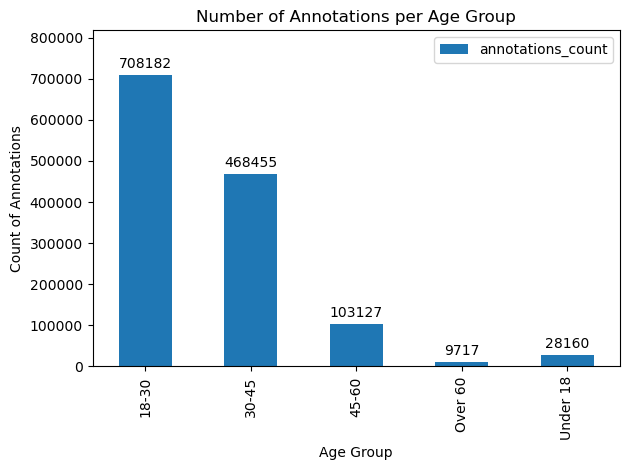

In [88]:
annotations_per_agegroup = (
    toxicity_a_c_d.groupby("age_group")["rev_id"]
    .count()
    .reset_index(name="annotations_count")
)

plt.figure(figsize=(8,5))
ax = annotations_per_agegroup.plot(
    kind="bar",
    x="age_group",         
    y="annotations_count"
)
plt.title("Number of Annotations per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Annotations")
plt.tight_layout()

# code from ChatGPT
# prompt: how do I add counts above the bars in matplotlib? and how do I get it to
# not overlap with the top line?
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
# end code from ChatGPT

# save data and plot for reproducibility
annotations_per_agegroup.to_csv('Wikipedia_Talk_annotations_per_agegroup_20022016.csv')
plt.savefig('Wikipedia_Talk_annotations_per_agegroup_20022016.png')

plt.show()

The average age of annotators is skewed younger. Most annotators are between 18-45. Annotators above 45 and below 18 make up a smaller proportion of this dataset. Ideally annotations would be provided by a a comparable number of people in each age group. This would help remove any impacts that the age of the annotator has on identifying hate speech.

Create a column toxicity_present to flag whether the majority of annotator's viewed a comment as toxic.

In [89]:
mean_toxicity = (
    toxicity_a_c_d
    .groupby("rev_id", as_index=False)
    .agg({
        "toxicity": "mean"
    })
    .rename(columns={"toxicity": "mean_toxicity"})
)

mean_toxicity['toxicity_present'] = mean_toxicity['mean_toxicity'] > 0.5
mean_toxicity.head()

,rev_id,mean_toxicity,toxicity_present
0,2232.0,0.111111,False
1,4216.0,0.000000,False
2,8953.0,0.000000,False
3,26547.0,0.000000,False
4,28959.0,0.250000,False


Let's get an idea of how many of the total comments are toxic. There are 159686 comments.

In [90]:
len(mean_toxicity)

159686

There are 16220 toxic comments

In [91]:
mean_toxicity['toxicity_present'].sum()

16220

Create a dataframe that contains the original annotations as well as the toxicity_present field. 

In [92]:
toxicity_annotations_and_mean = toxicity_a_c_d.merge(mean_toxicity, how = 'inner', on = 'rev_id')
toxicity_annotations_and_mean.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,mean_toxicity,toxicity_present
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors,0.111111,False
1,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,4000,0,0.0,male,1,18-30,hs,0.111111,False
2,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3989,0,1.0,female,0,18-30,bachelors,0.111111,False
3,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1574,0,1.0,female,0,30-45,bachelors,0.111111,False
4,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1508,0,1.0,female,1,45-60,hs,0.111111,False


I want to calculate the number of times each age group disagreed with the consensus toxicity score. Create a column that says whether the annotator agreed with the consensus score.

In [93]:
toxicity_annotations_and_mean['toxicity_agreement'] = toxicity_annotations_and_mean['toxicity_present'] == toxicity_annotations_and_mean['toxicity']
toxicity_annotations_and_mean.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,mean_toxicity,toxicity_present,toxicity_agreement
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors,0.111111,False,True
1,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,4000,0,0.0,male,1,18-30,hs,0.111111,False,True
2,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,3989,0,1.0,female,0,18-30,bachelors,0.111111,False,True
3,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1574,0,1.0,female,0,30-45,bachelors,0.111111,False,True
4,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,1508,0,1.0,female,1,45-60,hs,0.111111,False,True


I want to look at how this agreement varies by age group. I will calculate proportion of total comments reviewed where the annotator agreed with the toxicity consensus to take account of the fact that the age groups reviewed different numbers of comments. I will get the proportion by inner joining the dataframe created earlier showing number of annotations per age group. 

In [94]:
agreement_per_agegroup = (
    toxicity_annotations_and_mean[toxicity_annotations_and_mean["toxicity_agreement"]]
    .groupby("age_group")
    .size()
    .reset_index(name = "agreement_count")
)

agreement_and_comments_per_agegroup = agreement_per_agegroup.merge(annotations_per_agegroup, how = 'inner', on = 'age_group')
agreement_and_comments_per_agegroup['prop_agreement'] = agreement_and_comments_per_agegroup['agreement_count']/ agreement_and_comments_per_agegroup['annotations_count']
agreement_and_comments_per_agegroup

,age_group,agreement_count,annotations_count,prop_agreement
0,18-30,650721,708182,0.918861
1,30-45,431836,468455,0.921830
2,45-60,94314,103127,0.914542
3,Over 60,8938,9717,0.919831
4,Under 18,26218,28160,0.931037


The proportion of agreement with the toxicity consensus looks close for the age groups. Differences are about 1% from each other. I will use logistic regression to determine statistically whether there is a difference in agreement levels between the age groups. 

In [95]:
toxicity_annotations_and_mean["toxicity_agreement"] = toxicity_annotations_and_mean["toxicity_agreement"].astype(int)

model = smf.logit("toxicity_agreement ~ C(age_group)", data=toxicity_annotations_and_mean).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.279098
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     toxicity_agreement   No. Observations:              1317641
Model:                          Logit   Df Residuals:                  1317636
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:               0.0001673
Time:                        22:06:41   Log-Likelihood:            -3.6775e+05
converged:                       True   LL-Null:                   -3.6781e+05
Covariance Type:            nonrobust   LLR p-value:                 1.170e-25
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.4270      0.004    557.669      0.000       2.418

The p-value less than 0.05 indicates that this model is significant. In the p-values for the coefficients for the individual age groups it can be seen that each age group has a statistically significant difference in agreement with the consensus when compared to each other except for when the over 60 age group is compared to the 18-30 age group. However, the r-squared for this model is very low at 0.02%. This means that this is a significant but weak model so there is not a large practical difference between age groups.

### End of Analysis 2
What did you find?
I found that the number of comments labeled for toxicity by different age groups was very different. The vast majority of annotators were 18-45. A logistic regression model found a statistically significant difference between proportion of times a given age group identified a comment as toxic compared to the consensus desigation but the effect size of this is low.

What potential sources of bias did you find?
I identified potential external bias from age group of annotators. All age groups were not equally represented in the annotator pool. It was also not stated whether the annotators reflected the age distribution of Wikipedia editors. If there was a mismatch between Wikipedia editors and annotators, this could also be a population bias since the training data did not reflect Wikipedia's user pool.

What are some potential impacts of these biases if this dataset were used as part of a product like Perspective API?
The logistic model suggested slight differences in how age groups identified comments as toxic. It is concerning that this data might be used on comments from platforms that have a different age distribution than Wikipedia. Since this model was primarily trained by young people 18-45 it likely is able to identify well things that are considered toxic to those generations, it could fail to identify toxicity aimed at older generations. This might systematically result in more toxicity toward those age groups. A potential impact of population bias would be if this dataset were used for Perspective API and then that was used to identify toxicity in video game discussion boards that might be dominated by users under 18, it could also fail to protect these users from toxic comments since these age groups were not well represented in the training dataset. 

One suggestion to correct this bias would be to make sure each comment is reviewed by an annotator of each age group when collecting the 10 labels. It is also important to clearly include in your documentation age group based limitations of the model and to recommend users of this work to update the work and tailor it to the age group of their users.


## Step 2: Discuss Further Implications
"1. Which, if any, of the demo applications linked above would you expect to work well for its intended audience, purpose, and context? Why?

I expect the Toxicity Over Time demo application to work well for its intended audience, purpose, and context. The intended audience is someone conducting a deeper study of online toxicity, and the purpose is to help them understand whether toxic comments lead to more toxic responses, as well as to identify the most toxic times of day. The context is that the graph displays scraped comments from *The Independent*, *Financial Times*, and *The Telegraph*.

This demo is effective primarily because it shows the actual comment text alongside the graph. Displaying the text is important because the Perspective API model appears biased toward flagging comments about marginalized groups as toxic. In this case, such false positives are acceptable since users can see the underlying text and are analyzing it retrospectively rather than in real time.

Conversely, an application that automatically filters comments from view in real time would be problematic, as it could disproportionately remove the voices of marginalized groups.

2. Which, if any, of these demo applications would you expect to perform poorly? Why?

I expect the Harassment Manager application to perform poorly because its target platform—social media—has a very different discourse style from Wikipedia comments, which were used to train the Perspective API.

The intended audience of the Harassment Manager is users who experience significant online harassment; its purpose is to help them document harassment and take action; and its context is primarily social media users who post content publicly. However, the Perspective API was trained on Wikipedia Talk page data, which consists of discussions between editors about article content.

Communication on Twitter (X) is much different: posts have strict character limits and typically involve one user posting content that others respond to, rather than collaborative editing discussions. Because of this, I expect the model to misinterpret tone, sarcasm, or slang common on social media.

Additionally, performance might vary by user group. For instance, if the user were a teenager, the tool might perform even worse, as teenagers were underrepresented in the original training data.

3. What are some potential unintended, negative consequences of using the Perspective API to power this kind of product? In your opinion, are these consequences likely or serious enough that you would recommend against deploying the product? Why or why not?

I will focus this answer on the Comment Filter demo. As mentioned above, I do not believe this product is ready for deployment. The tool allows users to hide comments based on a selected tolerance for toxicity.

My concern is that, as demonstrated in the *Engadget* article, statements such as “I am a gay Black woman” were rated as 87% toxic. This reflects a bias in the model toward assigning high toxicity scores to posts that mention marginalized identities. Deploying a system that automatically filters such comments could have dangerous negative consequences, effectively erasing discussions about identity or discrimination.

For example, if one of the connected news sources were to publish an article denying the Holocaust, users should be able to respond, challenge misinformation, and express how such content harms their communities. Silencing “toxic” comments without context risks suppressing legitimate discourse and backlash against harmful content.

4. Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

First, I believe the Perspective API needs clearer documentation. As seen in the research question analysis, the Wikipedia Talk training data has several limitations:

* It ends in 2016 and does not include time as a factor.
* Some age groups were underrepresented in the annotator pool.
* It was trained on editor discussions, which differ linguistically from other online communication styles.

These are valid design choices, but they should be*clearly and prominently stated in an accessible section of the model documentation. This information may exist, but it was not visible on the model overview pages I reviewed, making it too difficult for users to find.

Second, I would revisit the distribution of labelers to ensure representation from a diverse range of social and demographic backgrounds, particularly marginalized groups. Broader representation among annotators would likely help mitigate the bias toward misclassifying certain identity-related comments as toxic.

Finally, I appreciate that the Perspective API allows users to submit feedback when they disagree with a toxicity score. Expanding and publicizing this feature could further help improve the model’s accuracy and fairness over time."

-- Above text is from Chat GPT in response to prompt: Revise this text for grammar and flow.